<table>
    <tr>
      <td>
      <img src='https://www.ideal-ist.eu/sites/default/files/2018-10/logo_quantum_flagship.jpg' width=450>
      </td>
      <td>
      <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Logo_UniJena.svg/1200px-Logo_UniJena.svg.png' width=450>
      </td>
      <td>
      <img src='https://www.akc.ac.cy/images/2022/03/Funded-by-the-European-Union.png' width=450>
      </td>
     </tr>
</table>

<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Quantum Computing, Summer 2022</h1>
<h2 style="text-align: center;"><a href="https://qt.eu/">European Union Quantum Flagship /</a> <a href="https://qtom.qtedu.eu/">QTEdu Quantum Technology Open Master</a></h2>
<h2 style="text-align: center;"><a href="https://www.uni-jena.de/en">Friedrich Schiller University Jena</a></h2>
<h3><em>Quantum Fourier Transformation QFT-based Addition</em></h3>
<h3>Anastasiia Andriievska</h3>

</div>

In [ ]:
IBMQ.save_account('YOUR API KEY', overwrite=True)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import copy 
import operator
import math
from math import sqrt, pi
from numpy import pi
# Importing Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, Aer, IBMQ, transpile, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

sim = Aer.get_backend('aer_simulator') 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

Libraries imported successfully!


<h3>QFT-based Addition</h3>
<h4>Create a circuit, which adds binary numbers 𝑎 + 𝑏, where each of the numbers is stored in an individual quantum register.</h4>

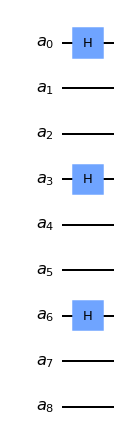

In [3]:
size=9
abit=QuantumRegister(size,name='a')
qc=QuantumCircuit(abit)
# the first number we want to add is 73 = 01001001 
qc.h(6)
qc.h(3)
qc.h(0)
# we use the h gate only to verify the correctness of the QFT
qc.draw()

<h4>Addition of two numbers using the quantum Fourier transform.</h4>

In [4]:
def QFT(size,as_gate=True):
    qc=QuantumCircuit(size)
    l=1
    for i in range(size-1):
        qc.h(i)
        k=size-1
        for l in range(i+1,k):
            qc.cp(pi/(2**(l-i)),l,i)
        k=k-1
        # qc.barrier()
    if (as_gate):
        U_s=qc.to_gate()
        U_s.name='QFT'
        return U_s
    else:
        return qc

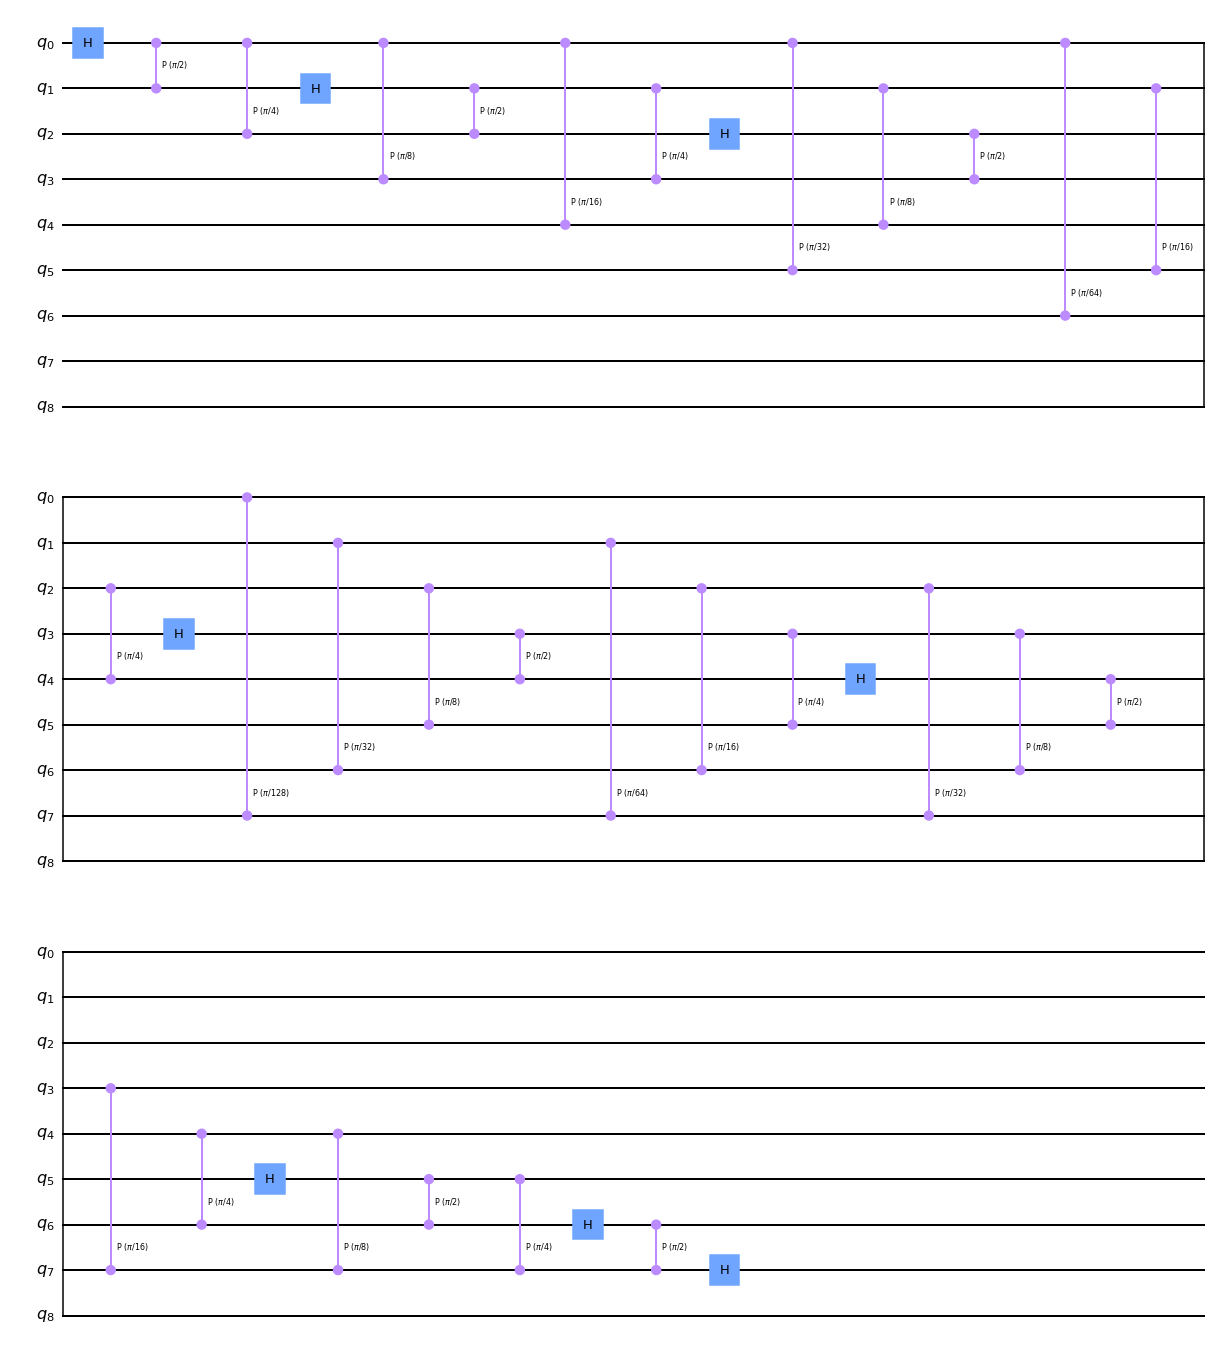

In [5]:
visualize = QFT(size,as_gate=False)
visualize.draw()
# This is the scheme of a 8bit QFT

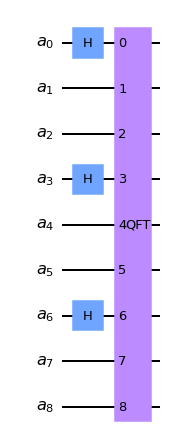

In [6]:
qc.append(QFT(size,as_gate=True),abit)
qc.draw()

<h5>Firstly perform addition on a QASM simulator:</h5>

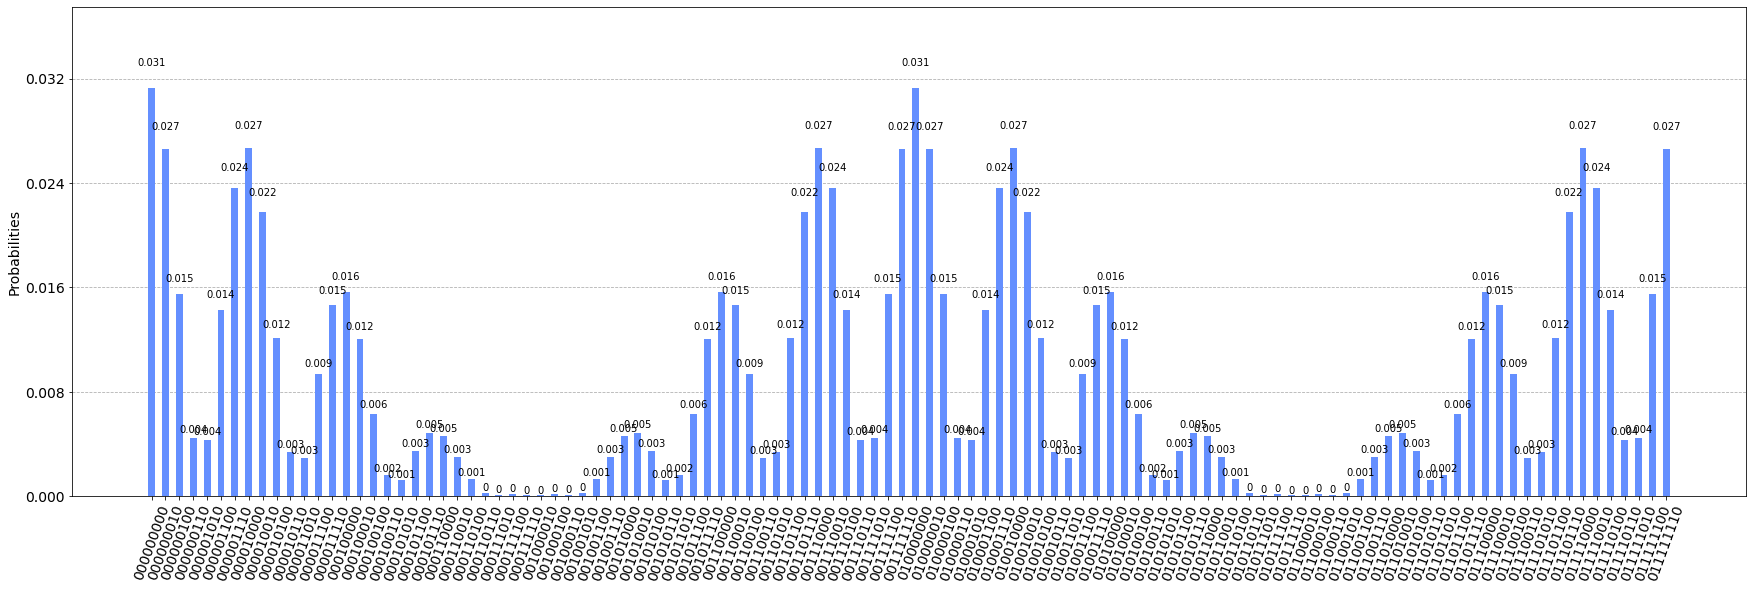

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
transpiled_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts, figsize=(30, 9))

In [8]:
def add2(size,as_gate=True):
    abits=QuantumRegister(9,name='a')
    bbits=QuantumRegister(9,name='b')
    qc=QuantumCircuit(abits,bbits)
    for i in range (size):
        for j in range (i,size):
            qc.cp(pi/2**(j-i),bbits[size-j],abits[size-i])
        #qc.barrier()
    if (as_gate):
        U_s=qc.to_gate()
        U_s.name='add2'
        return U_s
    else:
        return qc
    
# After the QFT, in order to add the second number, we must apply a series of controlled phase gates.   

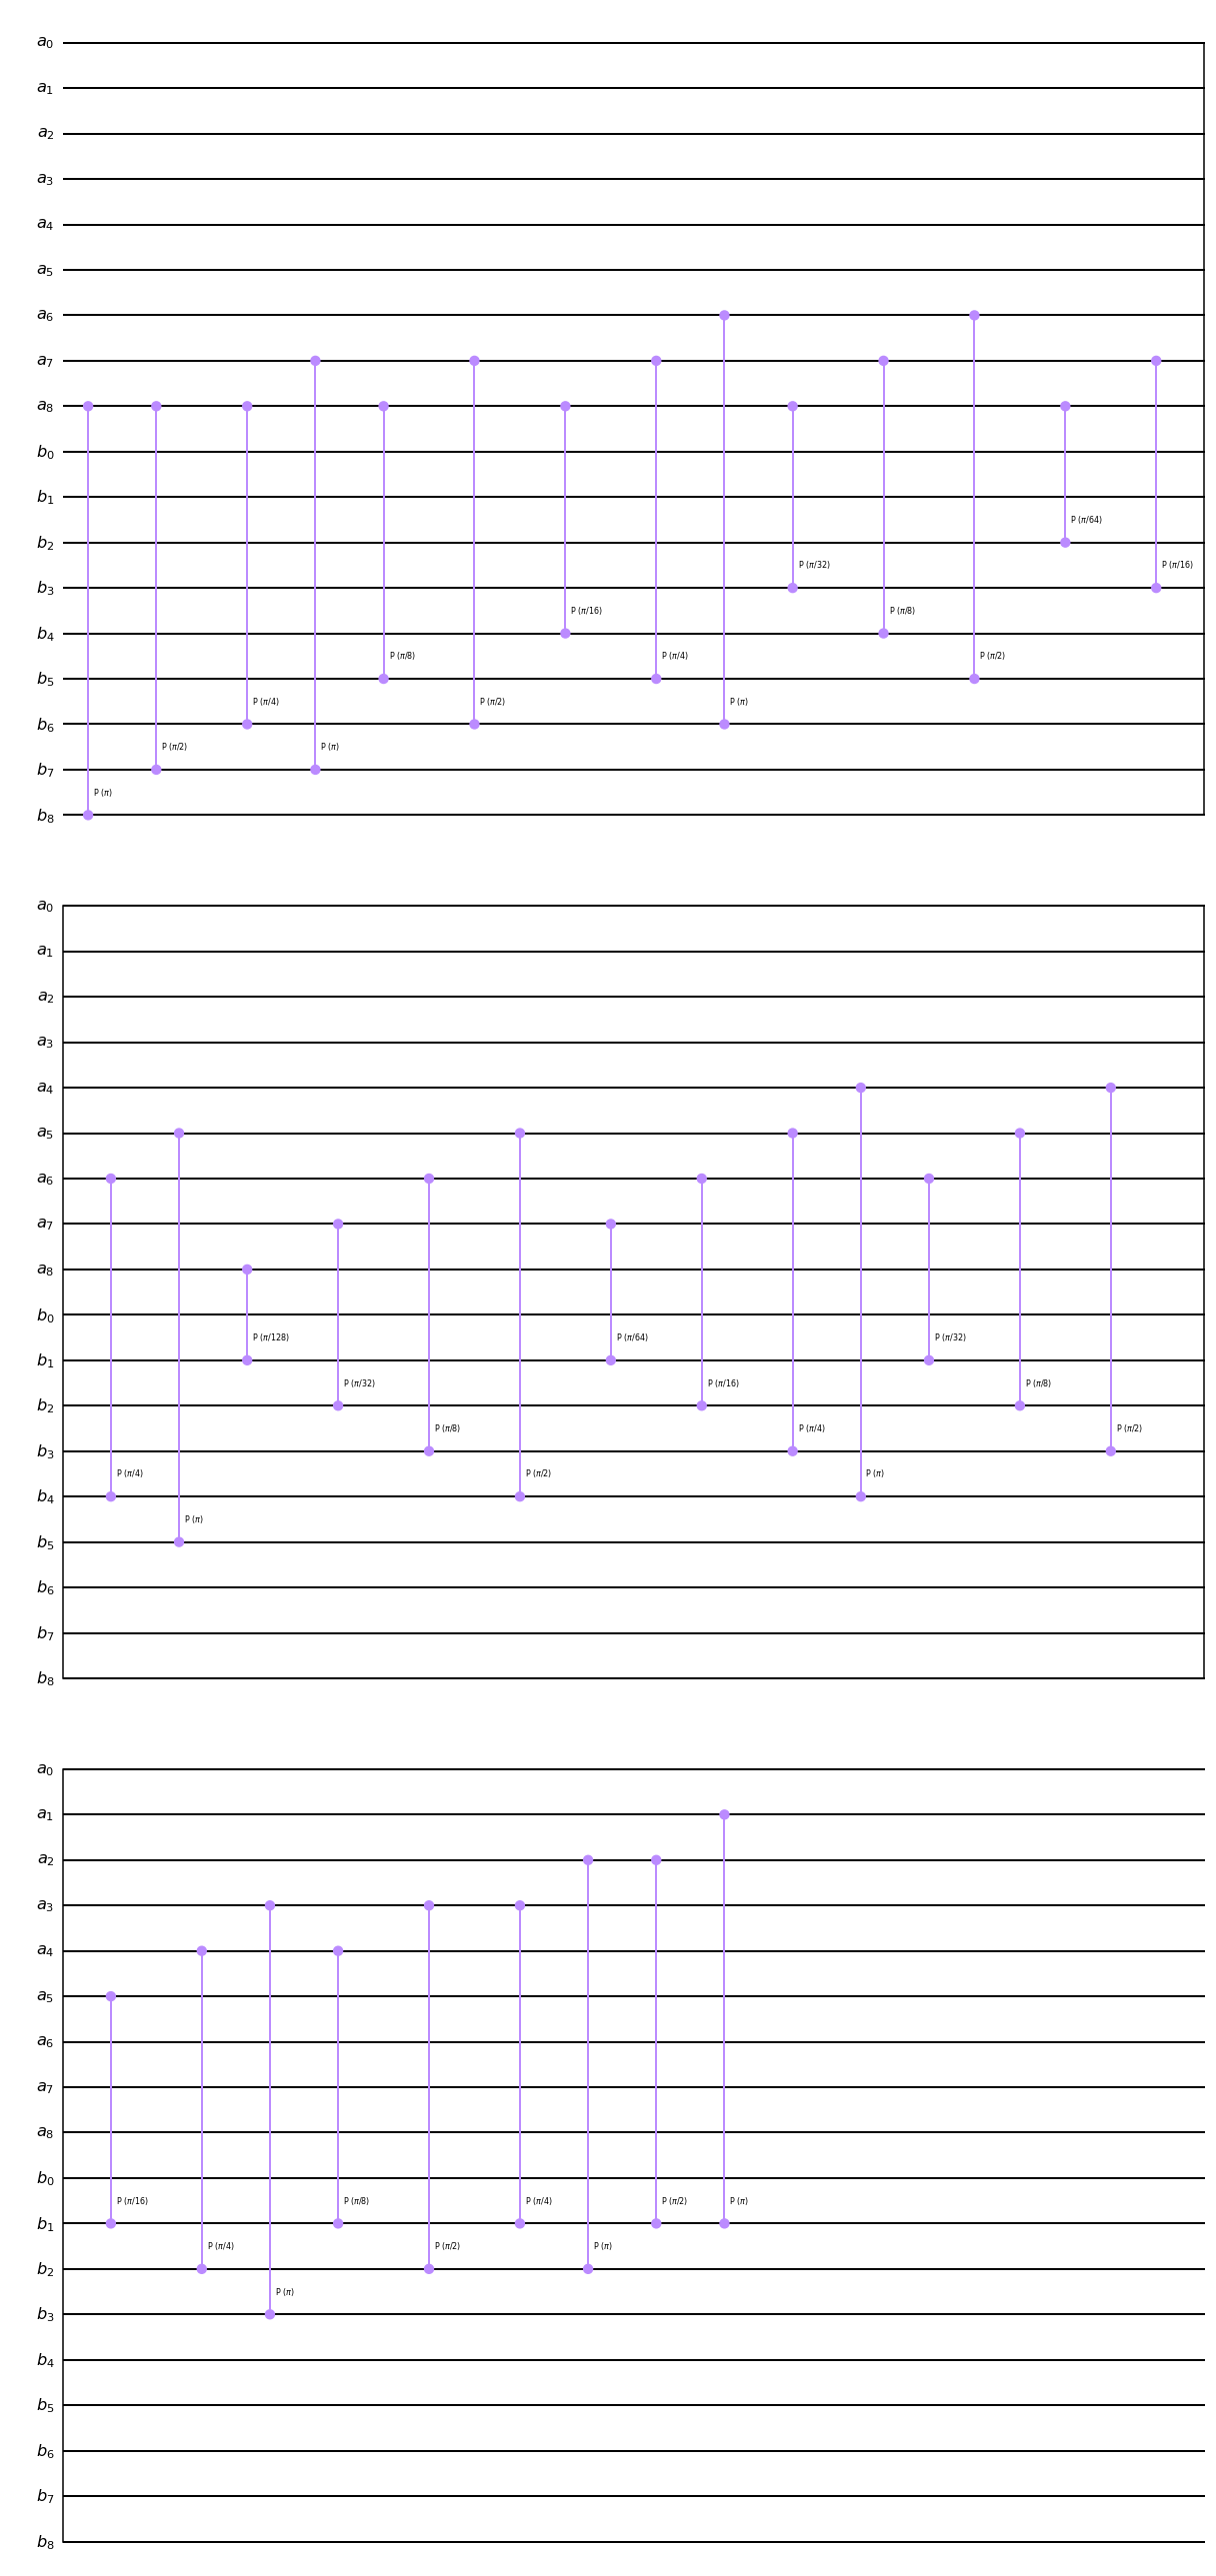

In [9]:
visual=add2(size-1,as_gate=False)
visual.draw()
#this is the scheme of the addition operator

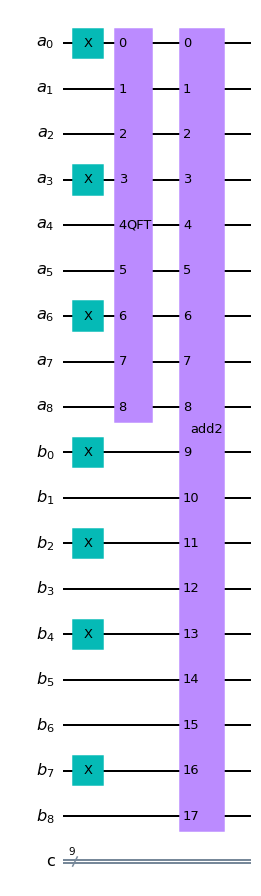

In [29]:
abit2=QuantumRegister(size,name='a')
bbit2=QuantumRegister(size,name='b')
cbit=ClassicalRegister(size,name='c')
qc2=QuantumCircuit(abit2,bbit2,cbit)
qc2.x(abit2[6])
qc2.x(abit2[3])
qc2.x(abit2[0])
qc2.x(bbit2[0])
qc2.x(bbit2[2])
qc2.x(bbit2[4])
qc2.x(bbit2[7])
qc2.append(QFT(size,as_gate=True),abit2)
qc2.append(add2(size-1,as_gate=True),[abit2[0],abit2[1],abit2[2],abit2[3],abit2[4],abit2[5],abit2[6],abit2[7],abit2[8],bbit2[0],bbit2[1],bbit2[2],bbit2[3],bbit2[4],bbit2[5],bbit2[6],bbit2[7],bbit2[8]])
qc2.draw()
# the second number we want to add is 10010101 (149)

In [22]:
# we will now apply a inverse QFT to the a bits
def IQFT(size,as_gate=True):
    qc=QuantumCircuit(size)
    for i in reversed(range(size-1)):
        k=size-1
        for l in reversed(range(i+1,k)):
            qc.cp(-pi/(2**(l-i)),l,i)
        k=k-1
        qc.h(i)
        #qc.barrier()
    if (as_gate):
        U_s=qc.to_gate()
        U_s.name='IQFT'
        return U_s
    else:
        return qc

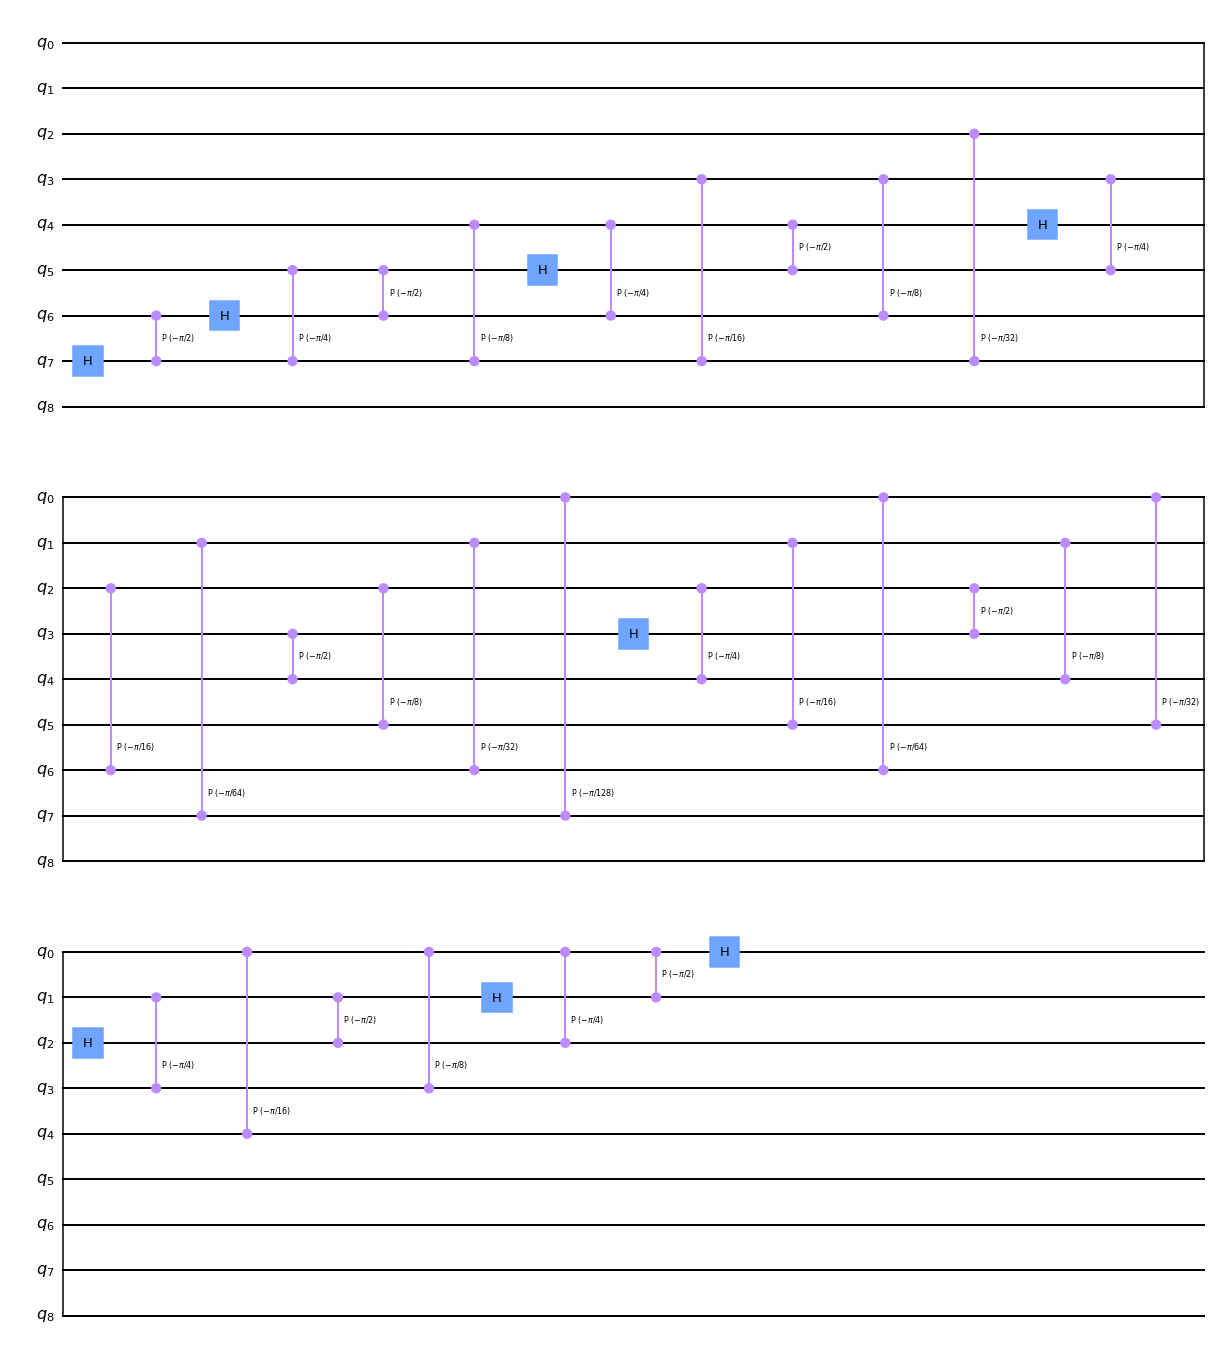

In [16]:
# This is the scheme of the inverse QFT
vis = IQFT(size,as_gate=False)
vis.draw()

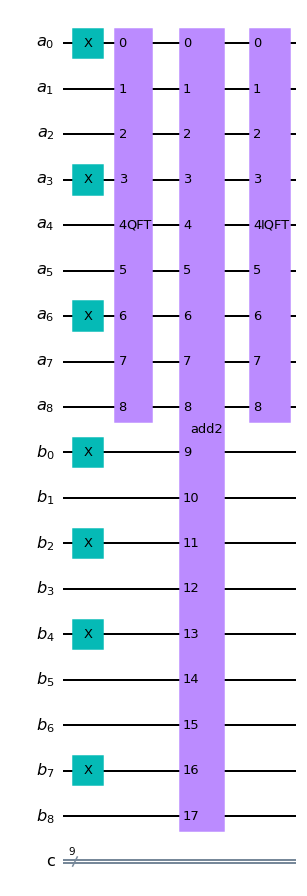

In [30]:
# We can see here the final scheme of the circuit
qc2.append(IQFT(size,as_gate=True),abit2)
qc2.draw()

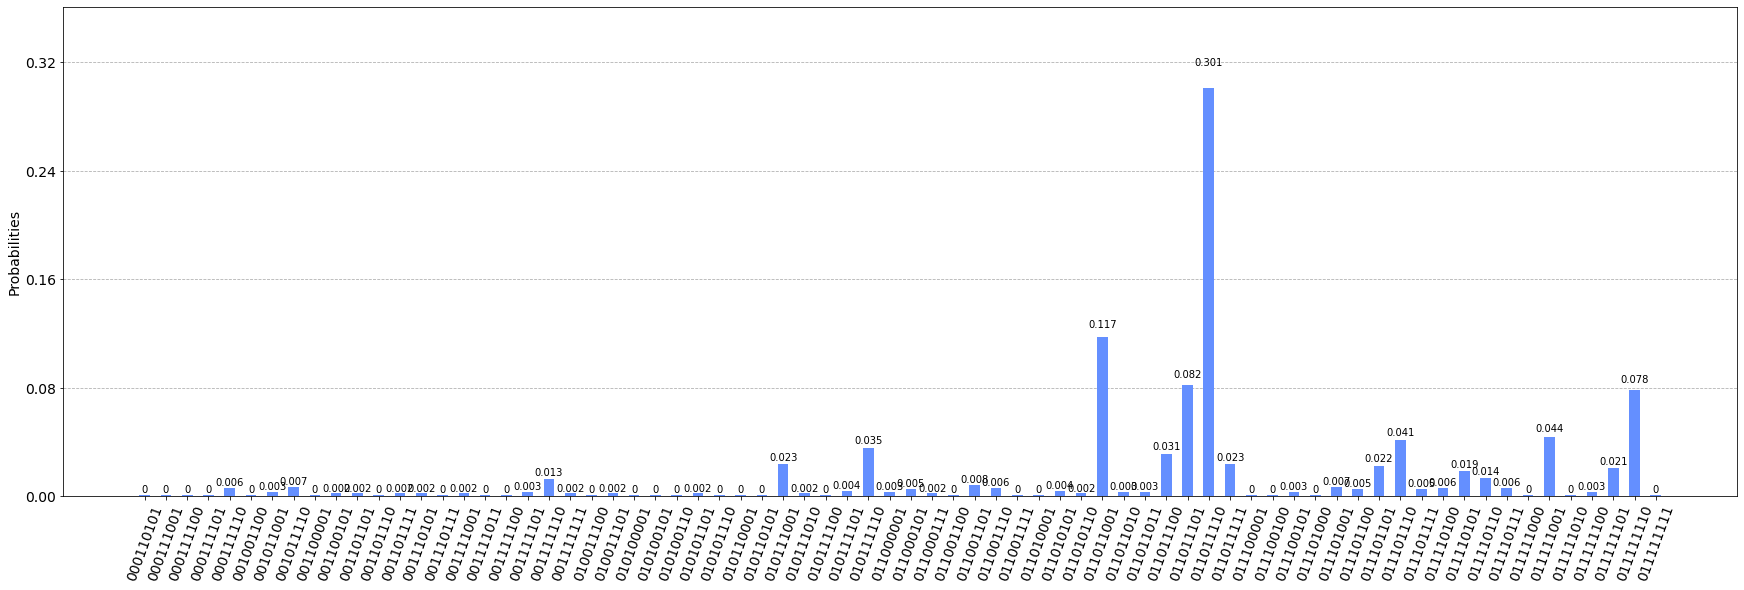

In [31]:
qc2.measure(abit2,cbit)
aer_sim = Aer.get_backend('aer_simulator')
qc2.save_statevector()
transpiled_circuit = transpile(qc2, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts, figsize=(30, 9))

#### We can see finally the results that the higher probability is given by the number 011011110, which correspond to 222.
#### Since the numbers we chose were a=73 and b=149 (and their sum is = 222), though the 8bit sum is correct.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table